![](https://miro.medium.com/max/700/1*HgXA9v1EsqlrRDaC_iORhQ.png)

In [ ]:
!gdown --id 1T-f1cibUX5fM0F7kH8n7r5l7GhYH4nHn

Downloading...
From: https://drive.google.com/uc?id=1T-f1cibUX5fM0F7kH8n7r5l7GhYH4nHn
To: /content/news-corpus-categorys-20181217.7z
100% 5.33G/5.33G [00:41<00:00, 128MB/s] 


In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive._mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!cp /content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/news-corpus-categorys-20181217.7z /content

In [ ]:
!sudo apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!7z x news-corpus-categorys-20181217.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 5326292134 bytes (5080 MiB)

Extracting archive: news-corpus-categorys-20181217.7z
--
Path = news-corpus-categorys-20181217.7z
Type = 7z
Physical Size = 5326292134
Headers Size = 606
Method = LZMA2:24
Solid = +
Blocks = 13

  0%      0% 1 - corpus/Công nghệ.txt                                  1% 1 - corpus/Công nghệ.txt                                  2% 1 - corpus/Công nghệ.txt                                  3% 1 - corpus/Công nghệ.txt                                

In [ ]:
!cp -r /content/corpus /content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.3 MB/s 


# Preprocess Data

In [2]:
import pandas as pd
import glob
import re

In [ ]:
import unidecode
 
def remove_accent(text):
    text = unidecode.unidecode(text)
    text = text.replace(' ', '_')
    text = text.lower()
    return text

ModuleNotFoundError: ignored

In [ ]:
for filename in glob.glob("/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/*.csv"):
  new_name = remove_accent(filename.split('/')[-1].replace(' ', '_').lower())
  print(filename)
  df = pd.read_csv(filename, usecols=['title', 'sapo', 'cate'])
  df = df[:15000]
  df['cate'] = df['cate'].apply(remove_accent)
  df.to_csv("/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v3/" + new_name, index=False)
  
  

/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Khoa học.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Xe cộ.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Công nghệ.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Giáo dục.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Nhà đất.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Thể thao.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Văn hóa.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Thế giới.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Đời sống.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Giải trí.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate/Xã hội.csv
/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_

## Combine data

In [ ]:
df_final = pd.DataFrame(columns=['title', 'sapo', 'cate'])

In [ ]:
for filename in glob.glob("/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v3/*.csv"):
    temp = pd.read_csv(filename)
    df_final = df_final.append(temp, ignore_index=True)

In [ ]:
df_final

,title,sapo,cate
0,Thaco nhập khẩu lô xe ô tô BMW đầu tiên về Việ...,"Ngày 28/12 vừa qua, lô xe ô tô BMW và MINI mới...",xe_co
1,Giá thuê Thuận Kiều Plaza tăng vọt sau khi 'đổ...,"Sau khi được cải tạo, giá thuê mặt bằng bán lẻ...",nha_dat
2,Thủy điện là 'hung thủ' làm sạt lở Hội An,Nguyên nhân chính là do quá một nửa lượng bùn ...,xa_hoi
3,Bài 3: Vai trò phù hợp cho doanh nghiệp nhà nước,"Hiện nay, doanh nghiệp nhà nước (DNNN) vẫn đan...",kinh_te
4,Núi lửa mạnh nhất Indoneisa phun trào khủng kh...,Trong khi mọi sự chú ý đang tập trung vào núi ...,khoa_hoc
...,...,...,...
193975,Phá thành công nhiều chuyên án về ma túy và ph...,"Ngày 23-1, Đại tá Hà Xuân Phú, Chính trị viên ...",phap_luat
193976,Đồng Tháp: Tổ chức Lễ giỗ lần thứ 88 cụ Phó bả...,Ủy ban nhân dân tỉnh Đồng Tháp vừa ban hành Kế...,van_hoa
193977,"Phó Chủ tịch Nguyễn Hữu Dũng trao quà, học bổn...","Nhân dịp Tết Nguyên đán Mậu Tuất 2018, ngày 29...",xa_hoi
193978,NASA công bố ảnh 'siêu bão' Vết Đỏ Lớn trên Sa...,Cơ quan Hàng không và Vũ trụ Mỹ (NASA) vừa côn...,khoa_hoc


In [ ]:
df_final = df_final[df_final['sapo'].str.len() > 20]

In [ ]:
# shuffle data
from sklearn.utils import shuffle
df_final = shuffle(df_final)

In [ ]:
# df_final.to_csv('/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v3/train.csv', index=False)
df_final = pd.read_csv('/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v3/train.csv')

## Importing Necessary Libraries

In [9]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 15.5 MB/s 
     |████████████████████████████████| 61 kB 453 kB/s 
     |████████████████████████████████| 596 kB 59.2 MB/s 
     |████████████████████████████████| 895 kB 55.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [10]:
import pandas as pd
import numpy as nphello
import numpy as np

import tensorflow as tf
import transformers #huggingface transformers library

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

## Configuration for TPUs

The given news classifier is trained on using BERT model. Since, BERT is a very large model, it requires gpu's and tpu's to train quickly. Here, I have used TPU's provided by Kaggle to train this model.

In [11]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  grpc://10.15.95.130:8470
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.15.95.130:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.15.95.130:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


## Preprocessing

In [ ]:
# df = pd.read_csv('/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/csv_cate_cuted/data_combine.csv')
df = df_final.reset_index(drop=True)
df.head()

In [ ]:
# count numbers of class
print(f"The dataset contains { df.cate.nunique() } unique categories")

In [ ]:
# label encoding the categories with sklearn. After this each category would be mapped to an integer.
encoder = LabelEncoder()
# df['cateEncoded'] = encoder.fit_transform(df['cate'])
df_train['cateEncoded'] = encoder.fit_transform(df_train['class'])
df_test['cateEncoded'] = encoder.fit_transform(df_test['class'])

In [ ]:
# We are using PhoBert-Large base on BERT-Large, so we need to lowercase word
df['title'] = df['title'].apply(lambda title: str(title).lower())
df['sapo'] = df['sapo'].apply(lambda sapo: str(sapo).lower())

In [ ]:
# calculating the length of headlines and descriptions
df['sapo_len'] = df['sapo'].apply(lambda x: len(str(x).split()))
df['title_len'] = df['title'].apply(lambda x: len(str(x).split()))

In [ ]:
df.describe()

,cateEncoded,sapo_len,title_len
count,193980.000000,193980.000000,193980.000000
mean,5.999804,40.254573,12.497556
std,3.741922,17.731674,3.373412
min,0.000000,4.000000,1.000000
25%,3.000000,29.000000,10.000000
50%,6.000000,36.000000,12.000000
75%,9.000000,47.000000,14.000000
max,12.000000,440.000000,59.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


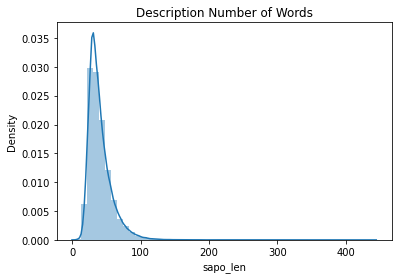

In [ ]:
sns.distplot(df['sapo_len'])
plt.title('Description Number of Words')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


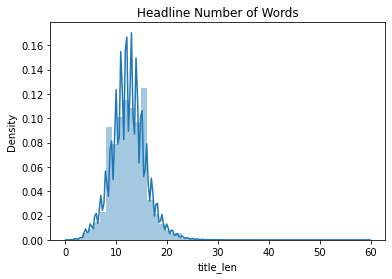

In [ ]:
sns.distplot(df['title_len'])
plt.title('Headline Number of Words')
plt.show()

As we can see, that there are a lot of samples that have a description length of 0, however almost all articles have a headline. Going with the intuition that the headline is often more descriptive of the category of the news, as well as to provide more text data to the model, I add news headlines to the short description and modify the description of the news samples.

In [ ]:
df['combine'] = df['title'] + df['sapo']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


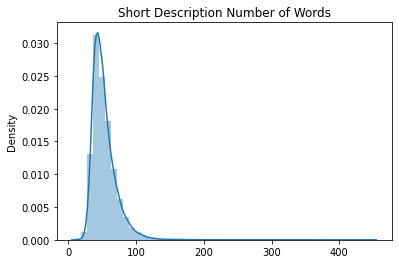

In [ ]:
sns.distplot(df['title_len'] + df['sapo_len'])
plt.title('Short Description Number of Words')
plt.show()

In [ ]:
import re
import six
def process(text):
  text = str(text)
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
  text = re.sub('@[^\s]+', 'AT_ABC', text)
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'([\w]+\) )', '.', text)
  text = re.sub(r'([\d]+\. )', '', text)
  text = re.sub(r'[^aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0-9., ]', '', text)
#   text = text.replace('.', '. ')
#   text = text.replace(' .', '. ')
  text = re.sub(r'[\s]+', ' ', text)
  text = text.strip('.')
  text = text.strip('\'"')
  text = text.strip()
#   text = text.lower()
  return text

In [ ]:
df['combine'] = df['combine'].apply(process)

In [ ]:
# df.to_csv('/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v3/processed_csv.csv', index=False)
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v3/processed_csv.csv')

## VNTC Dataset

In [3]:
!cp -r /content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed /content

In [4]:
df_train = pd.read_csv('/content/VNTC_processed/processed_data.csv')
df_test = pd.read_csv('/content/VNTC_processed/processed_data_test.csv')

In [5]:
# normalize label
def _underscore(text):
    text = text.replace(' ', '_')
    # text = combine_class(text)
    return text

def combine_class(text):
    if text == 'Hackers_va_Virus':
        return 'Tin_hoc'
    if text == 'San_pham_tin_hoc_moi':
        return 'Tin_hoc'
    if text == 'Giai_tri_tin_hoc':
        return 'Tin_hoc'
    return text
    
_underscore(df_train.loc[1]['class'])

'Am_nhac'

In [ ]:
df_train

In [6]:
# shuffle dataset
from sklearn.utils import shuffle
df_train = shuffle(df_train, random_state=23)
df_train.reset_index(inplace=True, drop=True)
df_train['class'] = df_train['class'].apply(_underscore)
df_test['class'] = df_test['class'].apply(_underscore)
# df_test = shuffle(df_test, random_state=23)
# df_test.reset_index(inplace=True, drop=True)

In [7]:
#25 class
print(len(set(df_train['class'])))
set(df_train['class'])


27


{'Am_nhac',
 'Am_thuc',
 'Bat_dong_san',
 'Bong_da',
 'Chung_khoan',
 'Cum_ga',
 'Cuoc_song_do_day',
 'Du_hoc',
 'Du_lich',
 'Duong_vao_WTO',
 'Gia_dinh',
 'Giai_tri_tin_hoc',
 'Giao_duc',
 'Gioi_tinh',
 'Hackers_va_Virus',
 'Hinh_su',
 'Khong_gian_song',
 'Kinh_doanh_quoc_te',
 'Lam_dep',
 'Loi_song',
 'Mua_sam',
 'My_thuat',
 'San_khau_dien_anh',
 'San_pham_tin_hoc_moi',
 'Tennis',
 'The_gioi_tre',
 'Thoi_trang'}

In [12]:
# label encoding the categories with sklearn. After this each category would be mapped to an integer.
encoder = LabelEncoder()
# df['cateEncoded'] = encoder.fit_transform(df['cate'])
df_train['cateEncoded'] = encoder.fit_transform(df_train['class'])
df_test['cateEncoded'] = encoder.fit_transform(df_test['class'])
np.save('/content/drive/MyDrive/cache/classes.npy', encoder.classes_)

<Figure size 6480x21600 with 0 Axes>

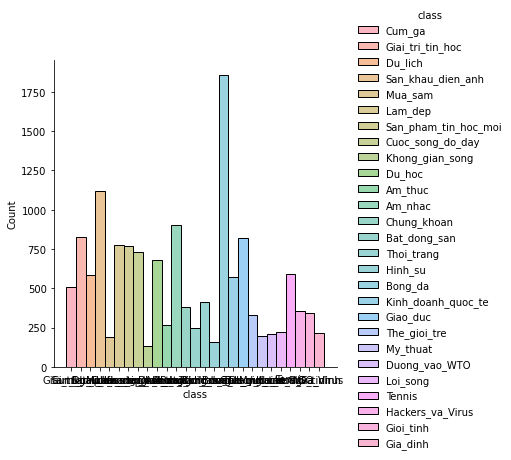

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(90,300))
ax = sns.displot(df_train, x="class", hue="class")
plt.show()

# Tokenizing

* I use the PhoBert tokenize the given news descriptions. After splitting up the dataset into train and test, we encode both the training data and the testing data. 
* One more thing to notice is that we truncate the last part of the sentence when encoding it, thus adding the headlines to the front of the description means that our model will always have the headline of the news sample.
* We also use Underthesea-toolkit instead of VNCoreNLP for better performance when getting the input of PhoBert

In [13]:
# PhoBert large uncased pretrained tokenizer
import torch
from transformers import AutoModel, AutoTokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/518M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/874k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Example PhoBert

In [14]:
!pip install underthesea
from underthesea import word_tokenize

     |████████████████████████████████| 7.5 MB 4.6 MB/s 
     |████████████████████████████████| 235 kB 53.2 MB/s 
     |████████████████████████████████| 743 kB 52.7 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=229764baecf1b9683e70a899ca616bc1d9c5ab458857a697fcba69794a0dcf1f
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
text = "Ông Nguyễn Khắc Chúc  đang làm việc tại Đại học Quốc gia Hà Nội. Bà Lan, vợ ông Chúc, cũng làm việc tại đây."
line = word_tokenize(text, format='text')
line1 = ["Ông Nguyễn_Khắc_Chúc đang làm_việc tại Đại_học Quốc_gia Hà_Nội ." ,"Bà Lan , vợ ông Chúc , cũng làm_việc tại đây ."]


In [ ]:
input_ids = torch.tensor([tokenizer.encode(line)])

with torch.no_grad():
    features = phobert(input_ids)
features

BaseModelOutputWithPoolingAndCrossAttentions([('last_hidden_state',
                                               tensor([[[ 0.3459,  0.7764, -0.0490,  ...,  0.1140, -0.2760,  0.2951],
                                                        [-0.0873,  0.4043, -0.3629,  ..., -0.2063, -0.0411, -0.6207],
                                                        [-0.0210,  0.1194, -0.1941,  ..., -0.1501, -0.1011,  0.0008],
                                                        ...,
                                                        [ 0.3760, -0.1998, -0.1219,  ..., -0.0852, -0.2473, -0.0744],
                                                        [ 0.2507,  0.2947, -0.1905,  ..., -0.1548, -0.1768,  0.0507],
                                                        [ 0.1967,  0.6701,  0.0363,  ...,  0.1305, -0.5042,  0.2215]]])),
                                              ('pooler_output',
                                               tensor([[ 3.9863e-01,  2.0418e-01,  7.7671e-02, 

In [ ]:
tokenizer.batch_encode_plus(
        line1,
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=512
    )

NameError: ignored

## Split data

In [15]:
def word_seg_dash(text):
    return word_tokenize(text, format='text')

In [16]:
def regular_encode(texts, tokenizer, maxlen=512):
    # word tokenize before input to bert
    texts = list(map(word_seg_dash, texts))
    # encode
    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen,
    )
    
    return np.array(enc_di['input_ids'])

In [ ]:
X_train,X_test ,y_train,y_test = train_test_split(df['combine'], df['cateEncoded'], random_state = 69, test_size = 0.2)

In [17]:
#VNTC
X_train = df_train['content']
y_train = df_train['cateEncoded']
X_test = df_test['content']
y_test = df_test['cateEncoded']

In [ ]:
X_train[5]

'sở hữu hương thơm trước kia người ta thường có thói quen dùng duy nhất một loại nước hoa để mình có hương thơm đặc trưng không lẫn với ai bây giờ cảm giác dễ chịu tự tin cho người dùng mới là ưu tiên hàng đầu cùng một loại nước hoa nhưng bạn dùng lại không có hương thơm như người khác da của mỗi người có một phản ứng khác nhau để điều tiết sự biến đổi khi tiếp xúc với nước hoa chính vì vậy nếu bạn biết cách chọn loại nước hoa phù hợp bạn sẽ có một mùi thơm riêng nước hoa bao giờ cũng tỏa hương mạnh và lâu khi được thoa vào sau tai cổ cườm tay khuỷu tay và khe ngực đó là những điểm thân nhiệt cao và khá kín đáo cách này thường dùng với nước hoa nồng độ cao với bình xịt bạn có thể xịt vào không khí trước mặt rồi bước vào làn sương đó hơi nước hoa sẽ thấm đều và hương vương trên tóc sẽ lưu lại suốt cả ngày ngoài ra bạn còn có thể nhỏ vài giọt tinh dầu vào bồn tắm hoặc vào nước khi giũ quần áo tại sao bạn không bắt đầu một ngày mới với hương thơm nhè nhẹ của loại nước hoa có nồng độ thấp 

In [ ]:
len(X_train)

14375

In [ ]:
# tokenizing the news descriptions and converting the categories into one hot vectors using tf.keras.utils.to_categorical
# we have 13 class, so num_classes=13
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=512)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=27,dtype = 'int32')
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=512)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=27,dtype = 'int32')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
with open('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/x_train.npy', 'wb') as f:
    np.save(f, Xtrain_encoded)
f.close()    
with open('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/y_train.npy', 'wb') as f:
    np.save(f, ytrain_encoded)
f.close()
with open('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/x_test.npy', 'wb') as f:
    np.save(f, Xtest_encoded)
f.close()
with open('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/y_test.npy', 'wb') as f:
    np.save(f, ytest_encoded)
f.close()

In [ ]:
!mkdir data_npy

In [ ]:
with open('/content/data_npy/x_train.npy', 'wb') as f:
    np.save(f, Xtrain_encoded)
f.close()    
with open('/content/data_npy/y_train.npy', 'wb') as f:
    np.save(f, ytrain_encoded)
f.close()
with open('/content/data_npy/x_test.npy', 'wb') as f:
    np.save(f, Xtest_encoded)
f.close()
with open('/content/data_npy/y_test.npy', 'wb') as f:
    np.save(f, ytest_encoded)
f.close()

In [ ]:
!gsutil cp -r data_npy gs://zalobert/

Copying file://data_npy/y_train.npy [Content-Type=application/octet-stream]...
Copying file://data_npy/y_test.npy [Content-Type=application/octet-stream]...
Copying file://data_npy/x_test.npy [Content-Type=application/octet-stream]...
Copying file://data_npy/x_train.npy [Content-Type=application/octet-stream]...
\ [4 files][105.8 MiB/105.8 MiB]                                                
Operation completed over 4 objects/105.8 MiB.                                    


In [18]:
Xtrain_encoded = np.load('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/x_train.npy')
ytrain_encoded = np.load('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/y_train.npy')
Xtest_encoded = np.load('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/x_test.npy')
ytest_encoded = np.load('/content/drive/Shareddrives/Anime_Olshiro/AIdata/VNTC_processed/data_npy_v2/y_test.npy')

In [ ]:
Xtrain_encoded.shape

(14375, 512)

In [ ]:
ytrain_encoded.shape

(14375, 27)

# Building the model

In [19]:
%load_ext tensorboard
import os

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [20]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    #adding dropout layer
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    #using a dense layer of 13 neurons as the number of unique categories is 40. 
    # out = tf.keras.layers.Dense(27, activation='softmax')(x)
    out1 = tf.keras.layers.Dense(784, activation='relu')(x)
    out2 = tf.keras.layers.Dropout(0.1)(out1)
    out3 = tf.keras.layers.Dense(392, activation='relu')(out2)
    out4 = tf.keras.layers.Dropout(0.1)(out3)
    out5 = tf.keras.layers.Dense(196, activation='relu')(out4)
    out6 = tf.keras.layers.Dropout(0.1)(out5)
    out7 = tf.keras.layers.Dense(98, activation='relu')(out6)
    # out8 = tf.keras.layers.Dropout(0.1)(out7)
    out9 = tf.keras.layers.Dense(27, activation='softmax')(out7)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out9)
    #using categorical crossentropy as the loss as it is a multi-class classification problem
    # resign loss
    lossF = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(tf.keras.optimizers.Adam(lr=3e-5, beta_1=0.9, beta_2=0.999), loss=lossF, metrics=['accuracy'])
    return model

In [ ]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    #adding dropout layer
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    #using a dense layer of 13 neurons as the number of unique categories is 40. 
    # out = tf.keras.layers.Dense(27, activation='softmax')(x)
    out1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,  return_sequences=True))(x),
    out2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu'))(out1),
    out3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu'))(ou2),
    out4 = tf.keras.layers.Dense(64)(out)
    out5 = tf.keras.layers.Dense(27, activation='softmax')(out4)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out5)
    #using categorical crossentropy as the loss as it is a multi-class classification problem
    # resign loss
    lossF = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(tf.keras.optimizers.Adam(lr=3e-5, beta_1=0.9, beta_2=0.999), loss=lossF, metrics=['accuracy'])
    return model

In [21]:
#building the model on tpu
with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('vinai/phobert-base')
    model = build_model(transformer_layer, max_len=512)
model.summary()

Downloading:   0%|          | 0.00/706M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_roberta_model (TFRoberta  TFBaseModelOutputWithPoo  134998272
 Model)                      lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             512, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#building the model on gpu
transformer_layer = transformers.TFAutoModel.from_pretrained('vinai/phobert-base')
model = build_model(transformer_layer, max_len=512)
model.summary()

Downloading:   0%|          | 0.00/706M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_roberta_model (TFRoberta  TFBaseModelOutputWithPoo  134998272
 Model)                      lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             512, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Training

In [22]:
#creating the training and testing dataset.
BATCH_SIZE = 16*strategy.num_replicas_in_sync #tpu
# BATCH_SIZE = 128 #gpu
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded)
    .batch(BATCH_SIZE)
)

In [ ]:
#training for 10 epochs
import datetime
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
my_callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=2),
    # tf.keras.callbacks.ModelCheckpoint("gs://zalobert/news_classify/training/model-{epoch:04d}.ckpt",
    #                                    save_weights_only=True,
    #                                    save_freq=1),
    # tf.keras.callbacks.TensorBoard(log_dir='gs://zalobert/news_classify/logs'),
]
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    epochs=10,
    # callbacks=my_callbacks,
)

Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 512) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 27) dtype=int32>]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 512) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 27) dtype=int32>]


112/112 [==============================] - 148s 467ms/step - loss: 2.2002 - accuracy: 0.4224
Epoch 2/10
112/112 [==============================] - 52s 466ms/step - loss: 0.5719 - accuracy: 0.8797
Epoch 3/10
112/112 [==============================] - 52s 466ms/step - loss: 0.3380 - accuracy: 0.9247
Epoch 4/10
112/112 [==============================] - 52s 466ms/step - loss: 0.2391 - accuracy: 0.9484
Epoch 5/10
112/112 [==============================] - 52s 466ms/step - loss: 0.1703 - accuracy: 0.9656
Epoch 6/10
112/112 [==============================] - 52s 467ms/step - loss: 0.1358 - accuracy: 0.9749
Epoch 7/10
112/112 [==============================] - 53s 469ms/step - loss: 0.1061 - accuracy: 0.9810
Epoch 8/10
112/112 [==============================] - 52s 468ms/step - loss: 0.0866 - accuracy: 0.9842
Epoch 9/10
112/112 [==============================] - 52s 467ms/step - loss: 0.0762 - accuracy: 0.9867
Epoch 10/10
112/112 [==============================] - 52s 466ms/step - loss: 0.086

In [ ]:
del model

In [ ]:
tensorboard --logdir=gs://zalobert/news_classify/logs

In [ ]:
from tensorflow.python.lib.io import file_io

In [ ]:
# tf.keras.models.save_model(model=model, filepath='gs://zalobert/news_classify/model.h5', overwrite=True, include_optimizer=True)

# model = tf.keras.models.load_model('gs://zalobert/news_classify/model')
# f = file_io.FileIO(name='gs://zalobert/news_classify/model.h5', mode='wb')
model.save_weights('model.hdf5')

In [ ]:
!cp model.hdf5 /content/drive/Shareddrives/Anime_Olshiro/AI_checkpoint/BertClassifier/train4/

In [ ]:
!gsutil cp model.hdf5 gs://zalobert/data_npy

Copying file://model.hdf5 [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

| [1 files][515.3 MiB/515.3 MiB]                                                
Operation completed over 1 objects/515.3 MiB.                                    


In [23]:
# load model
model.load_weights('/content/drive/Shareddrives/Anime_Olshiro/AI_checkpoint/BertClassifier/train4/model.hdf5')

# Evaluation

In [24]:
#making predictions
preds = model.predict(test_dataset,verbose = 1)
#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 512) dtype=int64>]


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


95/95 [==============================] - 33s 299ms/step


In [ ]:
test_dataset

<BatchDataset shapes: (None, 120), types: tf.int64>

In [30]:
preds[0][pred_classes[0]]

0.9937367

In [41]:
#extracting the classes from the label encoder
encoded_classes = encoder.classes_
#mapping the encoded output to actual categories
predicted_category = [encoded_classes[x] for x in pred_classes]
true_category = [encoded_classes[x] for x in y_test]
# true_category = [encoded_classes[x] for x in ytest_encoded]

In [ ]:
predicted_category.index('Bat_dong_san')

1213

In [42]:
result_df = pd.DataFrame({'combine':X_test,'true_category':true_category, 'predicted_category':predicted_category})
result_df.head()

,combine,true_category,predicted_category
0,cách diện của phương anh cuộc thi sao mai điểm...,Am_nhac,Thoi_trang
1,hội đồng anh vừa trao tặng selector chương trì...,Am_nhac,Am_nhac
2,chương trình chợ phiên đắk nông do thành đoàn ...,Am_nhac,Am_nhac
3,làm mới âm nhạc có đủ thứ cách đặt lời cho nhạ...,Am_nhac,Am_nhac
4,top ten trong nhạc phẩm được ưu chuộng nhất th...,Am_nhac,Am_nhac


In [43]:
print(f"Accuracy is {sklearn.metrics.accuracy_score(result_df['true_category'], result_df['predicted_category'])}")

Accuracy is 0.8923484597548857


In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir /content/drive/Shareddrives/Anime_Olshiro/AI_checkpoint/BertClassifier/train4

In [ ]:
result_df.to_csv('/content/drive/Shareddrives/Anime_Olshiro/AI_checkpoint/BertClassifier/train2/testPredictions.csv', index = False)

In [ ]:
!rm /content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v2/test*

rm: cannot remove '/content/drive/Shareddrives/Anime_Olshiro/AIdata/news-corpus/cuted_v2/test_set': Is a directory


## Confusion Matrix

In [ ]:
result_df[result_df['true_category']!=result_df['predicted_category']]

,combine,true_category,predicted_category
31,với giải quả cầu vàng đề cử của nghiệp đoàn cá...,Am nhac,San khau dien anh
48,việt tú chớp cơ hội để sáng tạo mê phim hành đ...,Am nhac,San khau dien anh
49,star wars dẫn đầu danh sách nhạc phim hay nhất...,Am nhac,San khau dien anh
89,hồ ngọc hà đôi khi tôi hơi coi thường đàn ông ...,Am nhac,Thoi trang
100,làm album nhạc mốt mới để chia tay tuổi học tr...,Am nhac,The gioi tre
...,...,...,...
12002,xuân lan tôi từng yêu hoàng thanh tình yêu của...,Thoi trang,San khau dien anh
12011,nguyễn phi hùng thời trang phải tạo được sức h...,Thoi trang,Am nhac
12041,thái lan xin đăng cai cuộc thi hoa hậu hoàn vũ...,Thoi trang,Cuoc song do day
12043,hồ quỳnh hương và cách phục trang độc đáo giọn...,Thoi trang,Am nhac


In [ ]:
result_df.loc[31]['combine']

'với giải quả cầu vàng đề cử của nghiệp đoàn các diễn viên điện ảnh screen actors guild và đề cử oscar brokeback mountain là bộ phim rình rang và được chú ý nhất khơi dậy đề tài nhạy cảm về đồng tính mặc dù cuối cùng núi bị vỡ brokeback mountain thất bại trước crash nhưng nhạc phim núi vẫn vớt được giải nhạc nền phim hay nhất phần nhạc của phim được soạn bởi nhạc sĩ gốc argentina gustavo santaolalla đậm chất nhạc đồng quê nhưng phần chính của đĩa nhạc đan xen giữa những bản nhạc không lời là những bài hát được trình bày bởi các giọng hát đậm dấu ấn riêng mở đầu đĩa là bài hòa tấu opening man mác buồn cô độc kế tiếp là willie nelson hát lại một sáng tác của bob dylan bài he was a friend of mine mới đây willie nelson vừa tung ra một ghi âm về cowboy đồng tính bài cowboys are frequently secretly fond of each others rất hợp thời điểm gustavo santaolalla là một nhà sản xuất quen thuộc của làng nhạc rock tiếng tây ban nha sản xuất album cho các nhóm mexico như molotov café tacuba và ca sĩ nổ

In [ ]:
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

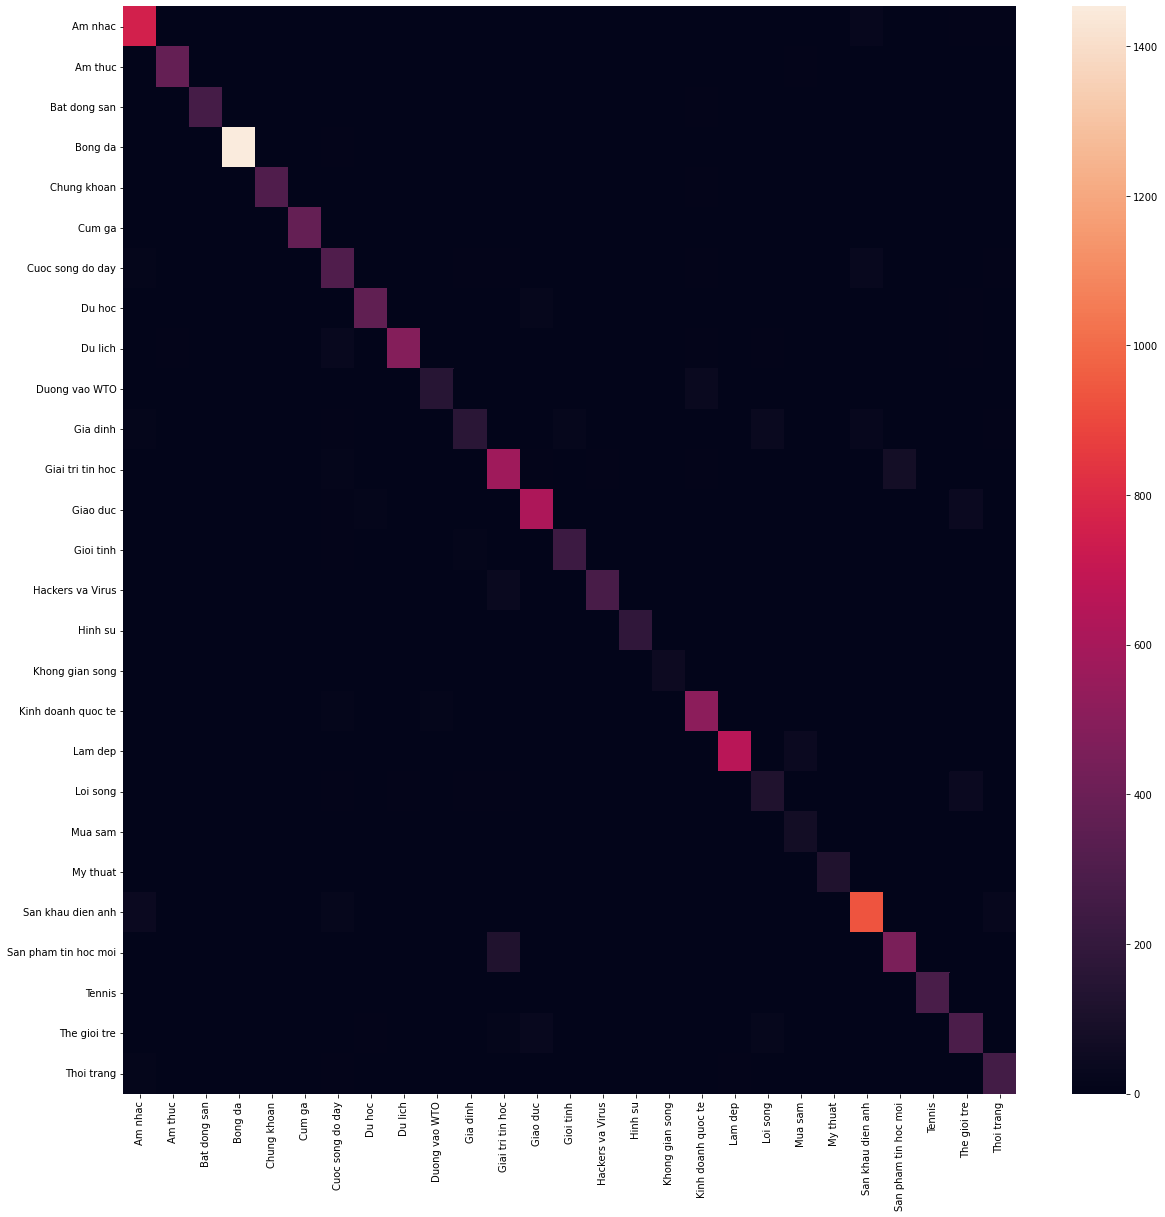

In [ ]:
df_cm = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(df_cm)